In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df1 = pd.read_csv('df_ant1_zero.csv')
df2 = pd.read_csv('df_ant2_zero.csv')
df3 = pd.read_csv('df_ant3_zero.csv')

In [11]:
X12 = (df1['I'] + 1j*df1['Q']) * (df2['I'] - 1j*df2['Q'])
X23 = (df2['I'] + 1j*df2['Q']) * (df3['I'] - 1j*df3['Q'])
X13 = (df1['I'] + 1j*df1['Q']) * (df3['I'] - 1j*df3['Q'])

In [12]:
d = {'channel': df1['Channel'],'x12': X12, 'x23': X23, 'x13': X13, 'idx1':df1['sample_idx'], 'idx2':df2['sample_idx'], 'idx3':df3['sample_idx']}
data = pd.DataFrame(data=d)
data['phi12'] = np.angle(X12)* 180/(2*np.pi)
data['phi23'] = np.angle(X23)* 180/(2*np.pi)
data['phi13'] = np.angle(X13)* 180/(2*np.pi)
data['amp12'] = np.abs(X12)
data['amp23'] = np.abs(X23)
data['amp13'] = np.abs(X13)
data

,channel,x12,x23,x13,idx1,idx2,idx3,phi12,phi23,phi13,amp12,amp23,amp13
0,0,-8.008000e+03+1.379000e+03j,-1.900000e+02-1.920000e+03j,5.600000e+02+2.030000e+03j,44,36,52,85.114667,-47.825747,37.288919,8.125866e+03,1.929378e+03,2.105825e+03
1,0,-8.340000e+03+5.260000e+02j,-1.453000e+03-1.015000e+03j,1.615000e+03+9.830000e+02j,45,37,53,88.195581,-72.531797,15.663784,8.356571e+03,1.772409e+03,1.890639e+03
2,0,-8.496000e+03+9.110000e+02j,-1.465000e+03-9.220000e+02j,1.654000e+03+8.090000e+02j,46,38,54,86.939867,-73.907839,13.032028,8.544702e+03,1.730985e+03,1.841249e+03
3,0,-8.352000e+03+9.030000e+02j,-1.455000e+03-1.332000e+03j,1.692000e+03+1.243000e+03j,47,39,55,86.914638,-68.763511,18.151126,8.400673e+03,1.972625e+03,2.099503e+03
4,0,-8.780000e+02-1.000000e+00j,1.031000e+03-2.200000e+01j,-3.416000e+03+6.900000e+01j,68,60,76,-89.967371,-0.611210,89.421418,8.780006e+02,1.031235e+03,3.416697e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,10,-5.172240e+05+1.140940e+05j,-2.022220e+05+6.958940e+05j,5.302300e+04-8.059810e+05j,575,567,583,83.780194,53.101750,-43.118056,5.296585e+05,7.246808e+05,8.077232e+05
6716,10,-1.029712e+06+7.080860e+05j,9.648750e+05+9.187200e+05j,-1.522032e+06-2.432940e+05j,596,588,604,72.742735,21.798162,-85.459103,1.249677e+06,1.332303e+06,1.541354e+06
6717,10,-1.093600e+06+7.699200e+05j,9.100640e+05+9.799880e+05j,-1.582976e+06-3.356720e+05j,597,589,605,72.426779,23.559369,-84.013852,1.337437e+06,1.337383e+06,1.618174e+06
6718,10,-1.076897e+06+8.437790e+05j,8.803070e+05+1.007119e+06j,-1.572192e+06-2.988910e+05j,598,590,606,70.960153,24.421900,-84.617947,1.368090e+06,1.337621e+06,1.600351e+06


In [13]:
from filterpy.kalman import KalmanFilter

In [14]:
from filterpy.common import Q_discrete_white_noise

In [15]:
f = KalmanFilter (dim_x=2, dim_z=1)

In [48]:
f.x = np.array([[0.],   # theta
                [0.]])  #omega
f.F = np.array([[0.,1],
                [1.,1.]])
f.H = np.array([[1,0]])
f.P *= 100.
# f.R = 5 # scalar
f.R = np.array([[1]]) # dimentional
f.Q = 1

In [49]:
z12 = data['phi12']
results = []
for i in range(len(z12)):
    f.predict()
    f.update(z12[i])
    results.append(f.x)
#     print(f.x)
res_arr = np.asarray(results)
data['phi12_kf'] = res_arr[:,0]  
data['omega12_kf'] = res_arr[:,1]  

In [50]:
z23 = data['phi23']
results = []
for i in range(len(z23)):
    f.predict()
    f.update(z23[i])
    results.append(f.x)
res_arr = np.asarray(results)
data['phi23_kf'] = res_arr[:,0]
data['omega23_kf'] = res_arr[:,1] 

In [51]:
z13 = data['phi13']
results = []
for i in range(len(z13)):
    f.predict()
    f.update(z13[i])
    results.append(f.x)
res_arr = np.asarray(results)
data['phi13_kf'] = res_arr[:,0] 
data['omega13_kf'] = res_arr[:,1] 

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

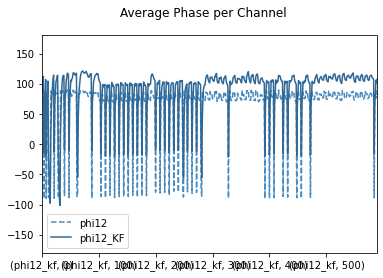

In [52]:
data.unstack(level=0)[['phi12']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588], ylim=[-180,+180], color = '#4B8BBE', linestyle='dashed',  label='phi12', legend=True)
data.unstack(level=0)[['phi12_kf']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588], ylim=[-180,+180], color= '#306998', label='phi12_KF', legend=True)


C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

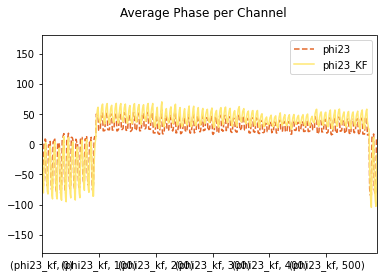

In [53]:
data.unstack(level=0)[['phi23']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588], ylim=[-180,+180], color= '#E4682A', linestyle='dashed', label='phi23', legend=True)
data.unstack(level=0)[['phi23_kf']].plot(subplots=True, title="Average Phase per Channel",xlim=[0,588],  ylim=[-180,+180], color= '#FFE873',  label='phi23_KF', legend=True)


C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

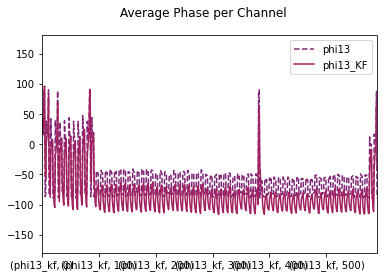

In [54]:
data.unstack(level=0)[['phi13']].plot(subplots=True, title="Average Phase per Channel",xlim=[0,588], ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='phi13', legend=True)
data.unstack(level=0)[['phi13_kf']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588],ylim=[-180,+180], color= '#A22160', label='phi13_KF', legend=True)


In [55]:
phi_channel = []
for i in range(0, len(data),96):
    phi_channel.append({"channel":data['channel'][i], 
                       "ave_phi12": np.average(data['phi12'][i-96:i]),
                       "ave_phi23": np.average(data['phi23'][i-96:i]), 
                       "ave_phi13": np.average(data['phi13'][i-96:i]),
                       "teta12_kf": np.average(data['phi12_kf'][i-96:i]),
                       "teta23_kf": np.average(data['phi23_kf'][i-96:i]),
                       "teta13_kf": np.average(data['phi13_kf'][i-96:i]), 
                       "omega12_kf": np.average(data['omega12_kf'][i-96:i]),
                       "omega23_kf": np.average(data['omega23_kf'][i-96:i]),
                       "omega13_kf": np.average(data['omega13_kf'][i-96:i])})
average_phi_perchannel = pd.DataFrame(phi_channel)
average_phi_perchannel=  average_phi_perchannel.drop([0])
average_phi_perchannel


C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,channel,ave_phi12,ave_phi23,ave_phi13,teta12_kf,teta23_kf,teta13_kf,omega12_kf,omega23_kf,omega13_kf
1,12,56.961157,-29.484397,-21.273239,77.007828,-39.356441,-27.610566,133.190677,-67.919347,-47.436984
2,24,58.290749,36.367944,-64.716307,79.791255,49.401968,-88.342980,138.247986,85.495434,-152.993669
3,25,57.714644,32.470228,-65.440128,78.846463,44.374865,-89.389243,136.571493,76.862544,-154.827940
4,13,77.152934,32.582308,-64.639758,105.375400,44.581757,-89.212193,182.509138,77.238670,-154.630611
5,36,65.877540,28.540860,-70.581600,89.976865,38.897715,-95.528006,155.837202,67.348372,-165.356486
...,...,...,...,...,...,...,...,...,...,...
65,0,54.140377,29.026696,-66.832926,73.948603,39.702090,-91.266439,128.077129,68.778995,-158.070811
66,24,78.346447,-28.684256,-40.337809,106.906793,-39.057682,-55.251360,185.144348,-67.620735,-95.738580
67,23,55.047179,31.604533,-65.223289,75.359950,42.979950,-88.989773,130.567460,74.399146,-154.102614
68,11,78.861933,40.587534,-58.675533,107.661800,55.471665,-80.153670,186.458322,96.084221,-138.833472


array([<AxesSubplot:>], dtype=object)

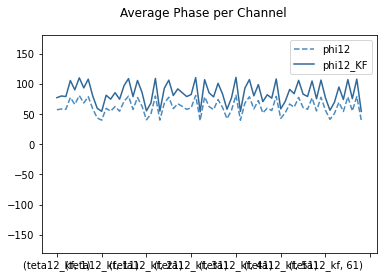

In [56]:
average_phi_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color = '#4B8BBE', linestyle='dashed',  label='phi12', legend=True)
average_phi_perchannel.unstack(level=0)[['teta12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#306998', label='phi12_KF', legend=True)

array([<AxesSubplot:>], dtype=object)

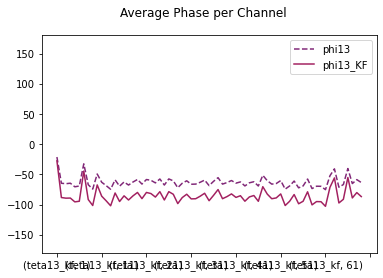

In [57]:
average_phi_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='phi13', legend=True)
average_phi_perchannel.unstack(level=0)[['teta13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#A22160', label='phi13_KF', legend=True)


array([<AxesSubplot:>], dtype=object)

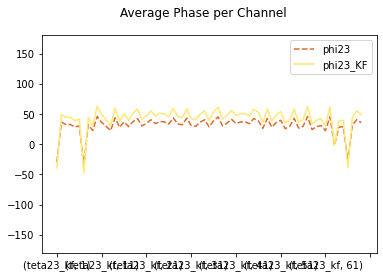

In [58]:
average_phi_perchannel.unstack(level=0)[['ave_phi23']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#E4682A', linestyle='dashed', label='phi23', legend=True)
average_phi_perchannel.unstack(level=0)[['teta23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873',  label='phi23_KF', legend=True)

In [59]:
print(np.average(average_phi_perchannel['ave_phi12']), np.average(average_phi_perchannel['ave_phi23']), np.average(average_phi_perchannel['ave_phi13']))
print(np.average(average_phi_perchannel['teta12_kf']), np.average(average_phi_perchannel['teta23_kf']), np.average(average_phi_perchannel['teta13_kf']))
print(np.average(average_phi_perchannel['omega12_kf']), np.average(average_phi_perchannel['omega23_kf']), np.average(average_phi_perchannel['omega13_kf']))

61.89845813449446 31.003732579095235 -62.77715711249725
84.54693326617938 42.3603719840922 -85.73314750640984
146.4378798169825 73.3726221712623 -148.48826654614993


In [60]:
sdata = data
len(sdata)
f

KalmanFilter object
dim_x = 2
dim_z = 1
dim_u = 0
x = [[-111.22200603 -192.94235502]].T
P = [[0.73205081 1.        ]
     [1.         1.73205081]]
x_prior = [[-185.72688719 -294.71791538]].T
P_prior = [[2.73205081 3.73205081]
           [3.73205081 5.46410162]]
x_post = [[-111.22200603 -192.94235502]].T
P_post = [[0.73205081 1.        ]
          [1.         1.73205081]]
F = [[0. 1.]
     [1. 1.]]
Q = 1
R = [[1]]
H = [[1 0]]
K = [[0.73205081 1.        ]].T
y = [[101.77556036]]
S = [[3.73205081]]
SI = [[0.26794919]]
M = [[0.]]
B = None
z = [[-83.95132682]]
log-likelihood = -1389.3217464344816
likelihood = 2.2250738585072014e-308
mahalanobis = 52.6829066956791
alpha = 1.0
inv = <function inv at 0x00000220E4FC6040>

In [61]:
f = KalmanFilter (dim_x=2, dim_z=1)

In [62]:
f.x = np.array([[0.],   # theta
                [0.]])  #omega
f.F = np.array([[0.,1],
                [1.,1.]])
f.H = np.array([[0,1]])
f.P *= 1000.
# f.R = 5 # scalar
f.R = np.array([[1.]]) # dimentional
f.Q = Q_discrete_white_noise(dim=2, dt=1e-6, var=0.13)

In [63]:
z12 = sdata['phi12']
results = []
for i in range(len(z12)):
    f.Q = Q_discrete_white_noise(dim=2, dt=1e-6, var=1/np.abs(sdata['x12'][i]))
    f.predict()
    f.update(z12[i])
    results.append(f.x)
#     print(f.x)
res_arr = np.asarray(results)
sdata['phi12_kf'] = res_arr[:,0] 
sdata['omega12_kf'] = res_arr[:,1] 

In [64]:
z23 = sdata['phi23']
results = []
for i in range(len(z23)):
    f.Q = Q_discrete_white_noise(dim=2, dt=1e-6, var=1/np.abs(sdata['x23'][i]))
    f.predict()
    f.update(z23[i])
    results.append(f.x)
#     print(f.x)
res_arr = np.asarray(results)
sdata['phi23_kf'] = res_arr[:,0] 
sdata['omega23_kf'] = res_arr[:,1] 

In [65]:
z13 = sdata['phi13']
results = []
for i in range(len(z13)):
    f.Q = Q_discrete_white_noise(dim=2, dt=1e-6, var=1/np.abs(sdata['x13'][i]))
    f.predict()
    f.update(z13[i])
    results.append(f.x)
#     print(f.x)
res_arr = np.asarray(results)
sdata['phi13_kf'] = res_arr[:,0] 
sdata['omega13_kf'] = res_arr[:,1] 

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

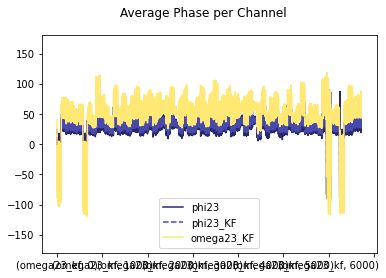

In [66]:
sdata.unstack(level=0)[['phi23']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#27286c', label='phi23', legend=True)
sdata.unstack(level=0)[['phi23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#4849ad', linestyle='dashed', label='phi23_KF', legend=True)
sdata.unstack(level=0)[['omega23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='omega23_KF', legend=True)


In [67]:
np.average(sdata['phi23']), np.average(sdata['phi23_kf']), np.average(sdata['omega23_kf'])

(31.110586300520627, 31.12097959080711, 50.3548027411177)

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

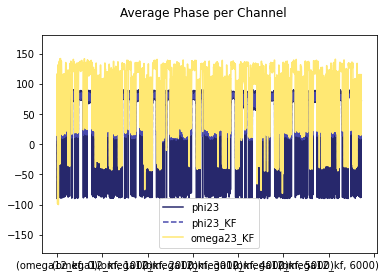

In [68]:
sdata.unstack(level=0)[['phi12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#27286c', label='phi23', legend=True)
sdata.unstack(level=0)[['phi12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#4849ad', linestyle='dashed', label='phi23_KF', legend=True)
sdata.unstack(level=0)[['omega12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='omega23_KF', legend=True)


In [69]:
np.average(sdata['phi12']), np.average(sdata['phi12_kf']), np.average(sdata['omega12_kf'])

(61.840568820905744, 61.829817479367264, 100.03819434629224)

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

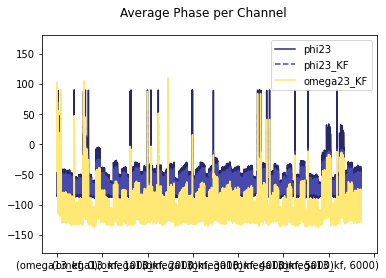

In [70]:
sdata.unstack(level=0)[['phi13']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#27286c', label='phi23', legend=True)
sdata.unstack(level=0)[['phi13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#4849ad', linestyle='dashed', label='phi23_KF', legend=True)
sdata.unstack(level=0)[['omega13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='omega23_KF', legend=True)


In [71]:
np.average(sdata['phi13']), np.average(sdata['phi13_kf']), np.average(sdata['omega13_kf'])

(-62.78098773571649, -62.755291641205, -101.54019484938186)

In [72]:
phi_channel = []
for i in range(0, len(data),96):
    phi_channel.append({"channel":sdata['channel'][i], 
                       "ave_phi12": np.average(sdata['phi12'][i-96:i]),
                       "ave_phi23": np.average(sdata['phi23'][i-96:i]), 
                       "ave_phi13": np.average(sdata['phi13'][i-96:i]),
                       "teta12_kf": np.average(sdata['phi12_kf'][i-96:i]),
                       "teta23_kf": np.average(sdata['phi23_kf'][i-96:i]),
                       "teta13_kf": np.average(sdata['phi13_kf'][i-96:i]), 
                       "omega12_kf": np.average(sdata['omega12_kf'][i-96:i]),
                       "omega23_kf": np.average(sdata['omega23_kf'][i-96:i]),
                       "omega13_kf": np.average(sdata['omega13_kf'][i-96:i])})
saverage_phi_perchannel = pd.DataFrame(phi_channel)
saverage_phi_perchannel=  saverage_phi_perchannel.drop([0])
saverage_phi_perchannel

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,channel,ave_phi12,ave_phi23,ave_phi13,teta12_kf,teta23_kf,teta13_kf,omega12_kf,omega23_kf,omega13_kf
1,12,56.961157,-29.484397,-21.273239,56.011213,-28.322054,-19.637699,90.309417,-45.826046,-31.774465
2,24,58.290749,36.367944,-64.716307,58.474718,35.927495,-64.572138,94.614082,58.131909,-104.479914
3,25,57.714644,32.470228,-65.440128,57.750669,32.501261,-65.437648,93.442546,52.588145,-105.880338
4,13,77.152934,32.582308,-64.639758,77.078275,32.662651,-65.687529,124.715270,52.849280,-106.284654
5,36,65.877540,28.540860,-70.581600,65.884841,28.454309,-69.541966,106.603912,46.040039,-112.521265
...,...,...,...,...,...,...,...,...,...,...
65,0,54.140377,29.026696,-66.832926,54.155039,29.077435,-66.808861,87.624693,47.048278,-108.099007
66,24,78.346447,-28.684256,-40.337809,78.196149,-28.407867,-40.555806,126.524027,-45.964894,-65.620673
67,23,55.047179,31.604533,-65.223289,55.285098,31.248042,-65.060946,89.453168,50.560395,-105.270822
68,11,78.861933,40.587534,-58.675533,78.729418,40.602442,-58.687781,127.386875,65.696130,-94.958825


array([<AxesSubplot:>], dtype=object)

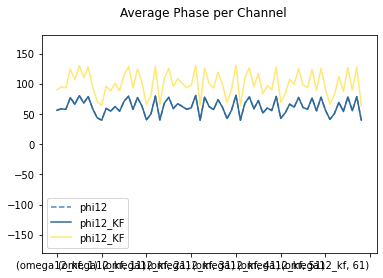

In [73]:
saverage_phi_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color = '#4B8BBE', linestyle='dashed',  label='phi12', legend=True)
saverage_phi_perchannel.unstack(level=0)[['teta12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#306998', label='phi12_KF', legend=True)
saverage_phi_perchannel.unstack(level=0)[['omega12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='phi12_KF', legend=True)

array([<AxesSubplot:>], dtype=object)

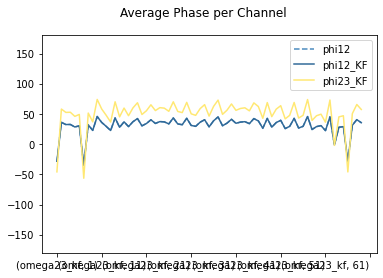

In [74]:
saverage_phi_perchannel.unstack(level=0)[['ave_phi23']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color = '#4B8BBE', linestyle='dashed',  label='phi12', legend=True)
saverage_phi_perchannel.unstack(level=0)[['teta23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#306998', label='phi12_KF', legend=True)
saverage_phi_perchannel.unstack(level=0)[['omega23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='phi23_KF', legend=True)

array([<AxesSubplot:>], dtype=object)

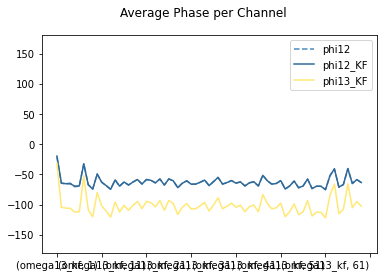

In [75]:
saverage_phi_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color = '#4B8BBE', linestyle='dashed',  label='phi12', legend=True)
saverage_phi_perchannel.unstack(level=0)[['teta13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#306998', label='phi12_KF', legend=True)
saverage_phi_perchannel.unstack(level=0)[['omega13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='phi13_KF', legend=True)

In [76]:
print(np.average(saverage_phi_perchannel['ave_phi12']), np.average(saverage_phi_perchannel['ave_phi23']), np.average(saverage_phi_perchannel['ave_phi13']))
print(np.average(saverage_phi_perchannel['teta12_kf']), np.average(saverage_phi_perchannel['teta23_kf']), np.average(saverage_phi_perchannel['teta13_kf']))
print(np.average(saverage_phi_perchannel['omega12_kf']), np.average(saverage_phi_perchannel['omega23_kf']), np.average(saverage_phi_perchannel['omega13_kf']))

61.89845813449446 31.003732579095235 -62.77715711249725
61.889275517005856 31.013356229967506 -62.75124061247853
100.13433350320418 50.180664485295736 -101.53364014721305
